# im23D_pipeline Pipeline Notebooks

These notebooks are here to supply a user with the base functionality of the pipeline. 

The overall goal of this project is to take data from (almost) any dataset (the verifiable ones are going to be Pix3D and ShapeNet v2 (available via login request at: [ShapeNet Website](https://shapenet.org/)

Overall this repo leverages the power of a few packages, [pydantic](https://pydantic-docs.helpmanual.io/), [pydantic_cli](https://github.com/mpkocher/pydantic-cli) (for command line interface) and [fsspec](https://filesystem-spec.readthedocs.io/en/latest/) (remote file systems and a (relatively) uniform API for working with files)


## Where did the code come from?

This repo is a composition of multiple different sources including:

In [ ]:
# Get an example file and put it into the ../data folder

!wget --no-check-certificate -O "../data/ShapeNetCore.v2_example.zip" "https://onedrive.live.com/download?cid=B654A7CBA0D23C19&resid=B654A7CBA0D23C19%21745801&authkey=ABOpWCcHdArmSxQ"

!unzip "../data/ShapeNetCore.v2_example.zip"

In [1]:
# Auto reload magic,
# ONLY run if you're developing
# and changing a bunch of stuff
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from im23D_pipeline.datasets import ShapeNetCoreDataset
from im23D_pipeline.pydantic_models import ShapeNetModel
import pandas as pnd

In [3]:
dataset_path = Path("../data/ShapeNetCore.v2/")

In [4]:
test_config = {"dataset_folder": dataset_path, "verbose": True}

shape_net_validated_inputs = ShapeNetModel(**test_config)

test = shape_net_validated_inputs.dict()["dataset_folder"]

len(shape_net_validated_inputs.dict()["dataset_list"])

finding all files in: ../data/ShapeNetCore.v2/**/*.obj
found 52472 number of obj files in the dataset


52472

In [5]:
test.as_posix()

'../data/ShapeNetCore.v2'

In [6]:
shape_net_validated_inputs.dataset_list[100]

'/home/bartelsaa/dev/img_to_3d_pipeline/notebooks/../data/ShapeNetCore.v2/02691156/157a81baeb10914566cf1b4a8fc3914e/models/model_normalized.obj'

## Now let's instantiate it in the dataset and start generating some data useful to the models!

In [7]:
shape_net_data_set = ShapeNetCoreDataset(shape_net_validated_inputs)

# shape_net_data_set.data_catalog_paths

adding columns: ['id', 'numVertices', 'sysnetId', 'modelId', 'min_0', 'min_1', 'min_2', 'max_0', 'max_1', 'max_2', 'centroid_0', 'centroid_1', 'centroid_2']


reading metadata per .obj file: 100%|██████████| 52472/52472 [02:06<00:00, 415.42it/s]


                                      mesh_file_path  \
0  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...   
1  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...   
2  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...   
3  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...   
4  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...   
5  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...   
6  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...   
7  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...   
8  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...   
9  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...   

                                       metadata_file  numVertices  sysnetId  \
0  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...         7826  02691156   
1  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...         2235  02691156   
2  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...         4425  02691156   
3  /home/bartelsaa/dev/img_to_3d_pipeline/noteboo...        34060  

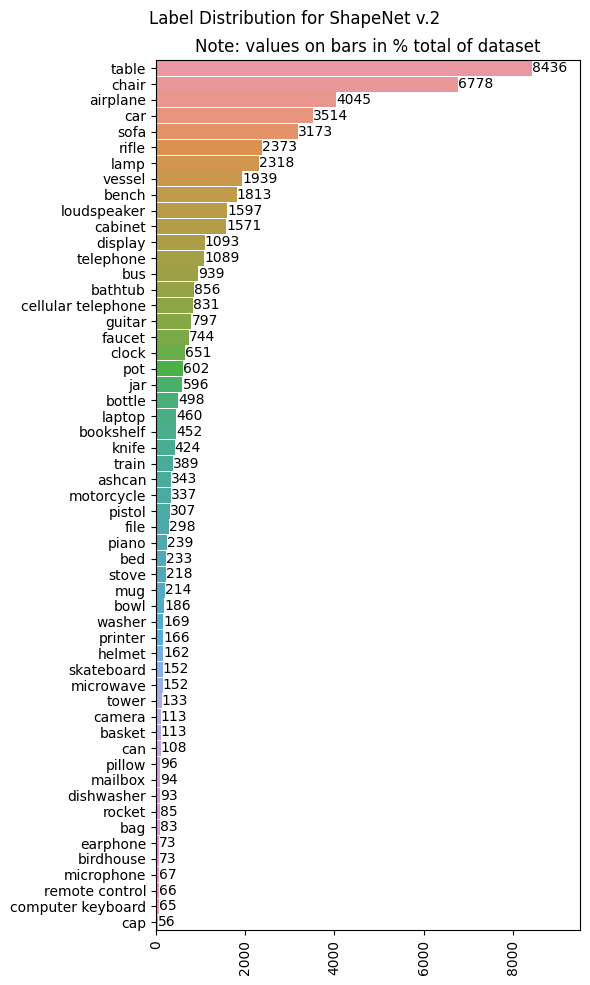

In [52]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
dataCatalog = pnd.read_csv(Path("../data/ShapeNetCore.v2/datacatalog_parts/datacatalog.csv"))
dataCatalog["simple_label"] = dataCatalog["simple_label"].astype("category")
to_plot = pnd.DataFrame(dataCatalog["simple_label"].value_counts(normalize=False, ascending=False)).round(decimals = 3)
to_plot_norm = pnd.DataFrame(dataCatalog["simple_label"].value_counts(normalize=True, ascending=False)).round(decimals = 3)
print()
# ax = to_plot[0:15].plot(kind="barh", figsize=(18, 12), colorbar=rvb(len()))
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 10))

g = sns.barplot(x=list(to_plot.simple_label.to_numpy()), y=list(to_plot.index), label="unique label counts", orient = 'h', width=0.95)
g = sns.barplot(x=list(to_plot.simple_label.to_numpy()), y=list(to_plot.index), label="unique label counts", orient = 'h', width=0.95)
plt.setp(ax.get_xticklabels(), rotation=80)
ax.set_xlim([0, 9500])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
ax.set_title("Note: values on bars in % total of dataset")
f.suptitle("Label Distribution for ShapeNet v.2")

plt.tight_layout()
plt.savefig("../images/shapenet_barplot.pdf")
# ax.invert_yaxis()
# test = dataCatalog["simple_label"].value_counts(sort=True)


In [ ]:
list(test.keys())

['table',
 'chair',
 'airplane',
 'car',
 'sofa',
 'rifle',
 'lamp',
 'vessel',
 'bench',
 'loudspeaker',
 'cabinet',
 'display',
 'telephone',
 'bus',
 'bathtub',
 'cellular telephone',
 'guitar',
 'faucet',
 'clock',
 'pot',
 'jar',
 'bottle',
 'laptop',
 'bookshelf',
 'knife',
 'train',
 'ashcan',
 'motorcycle',
 'pistol',
 'file',
 'piano',
 'bed',
 'stove',
 'mug',
 'bowl',
 'washer',
 'printer',
 'helmet',
 'skateboard',
 'microwave',
 'tower',
 'camera',
 'basket',
 'can',
 'pillow',
 'mailbox',
 'dishwasher',
 'rocket',
 'bag',
 'earphone',
 'birdhouse',
 'microphone',
 'remote control',
 'computer keyboard',
 'cap']

TypeError: Axis._set_ticklabels() missing 1 required positional argument: 'labels'

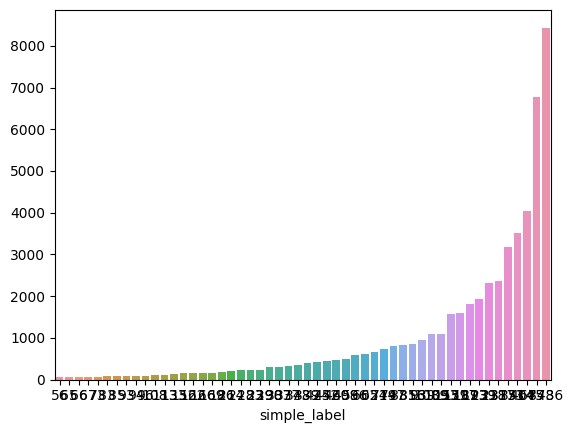

In [138]:
import seaborn as sns

g = sns.barplot(data=test, x=list(test.keys()), y=list(test.values), width=0.8)
plt.setp(ax.get_xticklabels(), rotation=45)

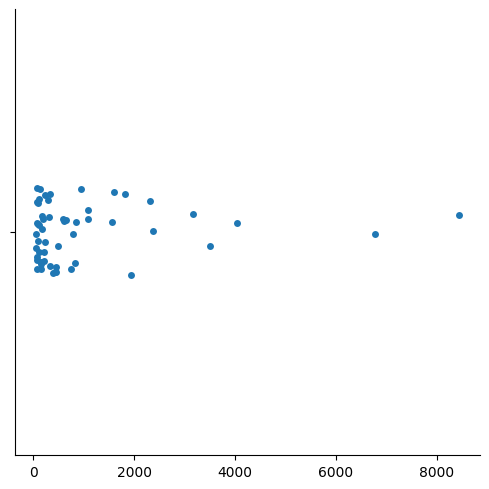

In [108]:
import seaborn as sns

sns.catplot(
    data=dataCatalog.simple_label,
    x="total_bill",
    y="day",
    hue="sex",
    kind="violin",
)